import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

adult = pd.read_csv("adult_with_pii.csv")
adult.head()

In [3]:
## Start queries
adult[adult['Age'] >= 40].shape[0]

17450

In [4]:
## a function f return a number => F(x) = f(x) + Lap(s/epsilon)
## When the s is the sensitivity of the function f - query function
## The sensitivity of a function f is the amount of the output's f changes when its input changes by 1
## with the counting/condition query => if one sample in the dataset is change => the sensitivity is 1

sensitivity = 1
epsilon = 0.1

In [23]:
## adnoise into query output
adult[adult['Age'] >= 40].shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)


17439.172112511205

In [24]:
## How much noise is enough?
## define the malicious query on Karrie

karries_row = adult[adult['Name'] == 'Karrie Trusslove']
karries_row[karries_row['Target'] == '<=50K'].shape[0]

1

In [31]:
## this result violates the privacy of Karrie
## add the laplace noise
karries_row = adult[adult['Name'] == 'Karrie Trusslove']
karries_row[karries_row['Target'] == '<=50K'].shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

0.9059696721500577

In [32]:
## as a result we cannot see any useful infomration from the query

## Unbounded DP: two datasets x & x' are considered neighbors if x' can be obtained from x by adding or removing one row => the sizes of x & x' are different
## Bounded DP: two datasets x & x' are considered neighbors if x' can be obtained from x by changing one row. The sizes ox x & x ' are equal'

## DP properties

In [36]:
## Three important properties are:
## Sequential Composition
## Parallel composition
## Post processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [34]:
# Theorem 1: (Sequential Composition)
# The bound on privacy cost given by sequential composition is an upper bound - actual privacy cost of two particular DP release
# may be smaller than this but never large
epsilon1 = 1
epsilon2 = 1
epsilon_total = 2
# satisfies 1-differential privacy
def F1():
    return np.random.laplace(loc=0, scale=1/epsilon1)
# satisfies 1-differential privacy
def F2():
    return np.random.laplace(loc=0, scale=1/epsilon2)
# satisfies 2-differential privacy
def F3():
    return np.random.laplace(loc=0, scale=1/epsilon_total)
# satisfies 2-differential privacy, by sequential composition
def F_combined():
    return (F1() + F2()) / 2

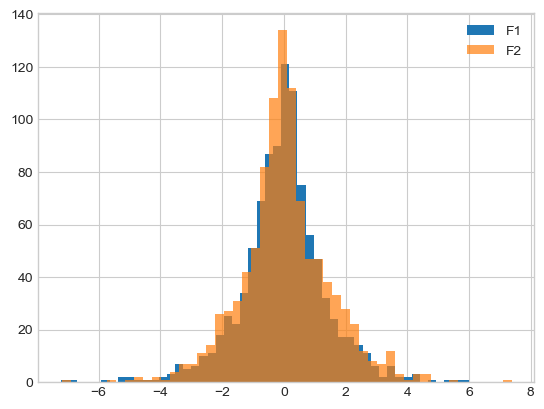

In [37]:
## the F1 and F2 have similar distributions of output
# plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# plot F2 (should look the same)
plt.hist([F2() for i in range(1000)], bins=50, alpha=.7, label='F2');
plt.legend();

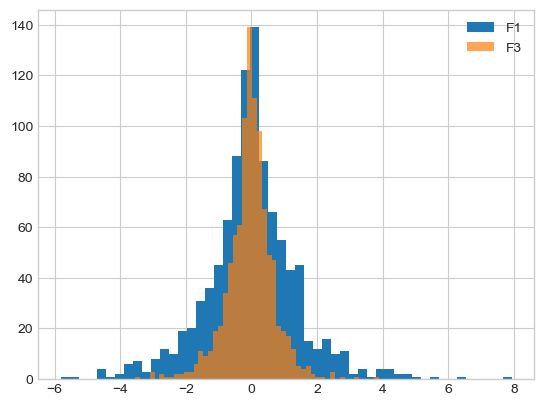

In [38]:
## Compare the F1 vs F3. the F3 looks pointier than F1 bcs higher epsilon => less privacy

# plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# plot F3 (should look "pointier")
plt.hist([F3() for i in range(1000)], bins=50, alpha=.7, label='F3');
plt.legend();

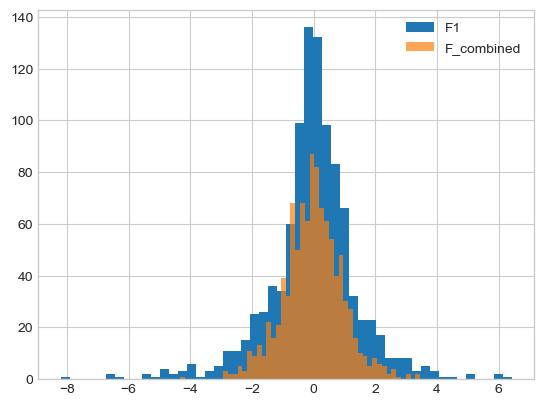

In [39]:
## F1 and F-combined, the 

# plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# plot F_combined (should look "pointier")
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined');
plt.legend();

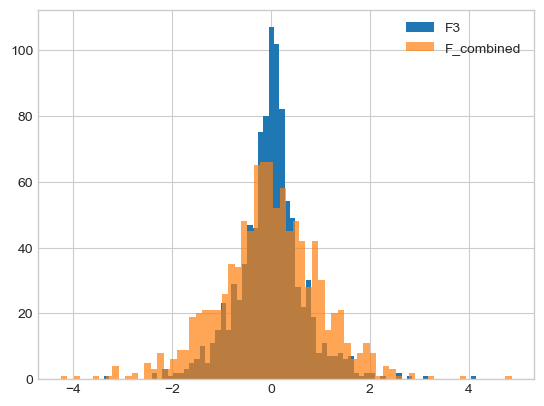

In [45]:
## F3 vs F_combined. The epsilon value are the same - both have epsilon = 2. Their output look like
# plot F1
plt.hist([F3() for i in range(1000)], bins=70, label='F3');

# plot F_combined (should look "pointier")
plt.hist([F_combined() for i in range(1000)], bins=70, alpha=.7, label='F_combined');
plt.legend();

In [46]:
## The Parallel Composition
## disjoin the dataset into multiple chunks. Each individual datapoint appear in exactly one chunk => if k chunks in ttal =>
## The mechanism runs exactly once on the data of each individual

In [47]:
## if F(x) satisfies epsilon DP => the Parallel Composition release all of the results satisfies epsilon DP
## THIS IS A MUCH BETTER BOUND THE SEQUENTIAL COMPOSITION. For the sequential => k*epsilon DP. But for the parallel, the privacy
## cost still epsilon DP dueto the data of each person only see one time.

In [48]:
## analyse the histogram data
## with the epsilon = 1.
adult = pd.read_csv("adult_with_pii.csv")
adult['Education'].value_counts().to_frame().head(5)

,Education
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1383


In [49]:
## apply the parallel composition
epsilon = 1

## the sensitivity is 1 

f = lambda x: x + np.random.laplace(loc = 0, scale = 1/epsilon)
s = adult["Education"].value_counts().apply(f)
s.to_frame().head(5)

,Education
HS-grad,10501.512558
Some-college,7292.894771
Bachelors,5353.517429
Masters,1725.854948
Assoc-voc,1382.672262


In [51]:
## Contigecy Tables => see the relationship btw the education level and gender
pd.crosstab(adult["Education"], adult["Sex"]).head(5)

Sex,Female,Male
Education,,
10th,295,638
11th,432,743
12th,144,289
1st-4th,46,122
5th-6th,84,249


In [52]:
## As we can see each row has independent analysis value
## => We can apply the parallel composition

ct = pd.crosstab(adult['Education'], adult['Sex'])
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
ct.applymap(f).head(5)

Sex,Female,Male
Education,,
10th,294.814759,635.332384
11th,432.262731,743.101750
12th,143.606848,289.863941
1st-4th,47.395997,122.853525
5th-6th,84.066731,248.918158
